# male population and hk recycling rate

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5525      0.577      7.891      0.000       3.340       5.765
Male_pop   -1.246e-06   1.72e-07     -7.226      0.000   -1.61e-06   -8.84e-07

R-squared: 0.7436


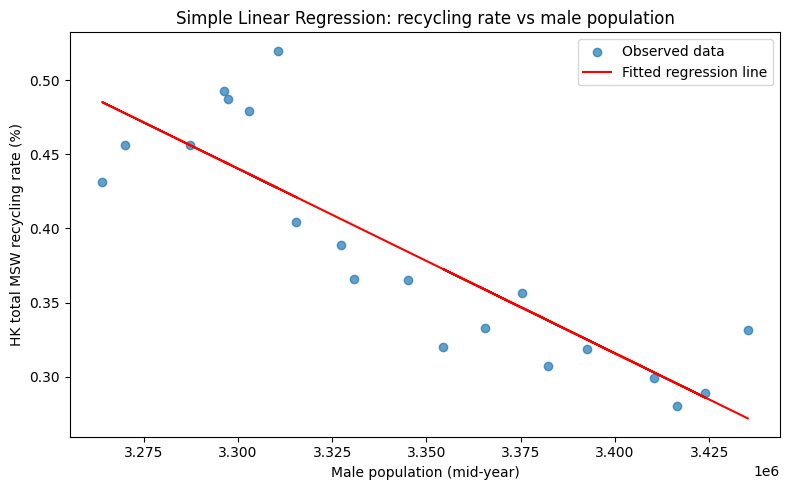

In [2]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset (HK MSW Volume and Recycling Rat sheet is the default first sheet)
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

# ---------- Simple Linear Regression: recycling rate vs male population ----------

# Column names (follow the cleaned-data headers exactly)
col_male = "Male population (mid-year)"
col_rate = "HK total MSW recycling rate"

# Prepare data
# Convert male population like "3,315,500" → 3315500
male_series = pd.to_numeric(
    df[col_male].astype(str).str.replace(",", ""),
    errors="coerce"
)

# Convert rate like "40%" → 40.0
rate_series = pd.to_numeric(
    df[col_rate].astype(str).str.rstrip("%"),
    errors="coerce"
)

# Keep rows where both variables are present
mask = male_series.notna() & rate_series.notna()
X_male = male_series.loc[mask].to_frame(name="Male_pop")   # shape (n, 1)
y_rate = rate_series.loc[mask]                             # shape (n,)

# Fit model using sklearn for predictions
lin_reg_male = LinearRegression()
lin_reg_male.fit(X_male, y_rate)

# Fit model using statsmodels for statistical tests
X_male_sm = sm.add_constant(X_male)  # Add constant term for intercept
model_male = sm.OLS(y_rate, X_male_sm)
results_male = model_male.fit()

# Predictions for plotting
y_pred_male = lin_reg_male.predict(X_male)

print("Model Summary:")
print(results_male.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_male.rsquared:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_male, y_rate, alpha=0.7, label="Observed data")
plt.plot(X_male, y_pred_male, color="red", label="Fitted regression line")
plt.xlabel("Male population (mid-year)")
plt.ylabel("HK total MSW recycling rate (%)")
plt.title("Simple Linear Regression: recycling rate vs male population")
plt.legend()
plt.tight_layout()
plt.show()


**Male population coefficient ($\hat \beta_1$) = -0.000125 (p ≈ 0.0000009 < 0.05)**  

- There is a **statistically significant negative association** between Hong Kong’s male population size and the overall MSW recycling rate: years with a larger male mid-year population tend to have a **lower** territory-wide recycling percentage.  

- Male population alone explains a **substantial share of the variation in recycling rate** (about **75% of the variance**, based on R-squared approx 0.75), though other policy, economic, and behavioural factors still contribute to the remaining unexplained variation in recycling performance.
